# apple_health simple usage
Author: Keita Mizukoshi

In [1]:
import pandas as pd
import datetime as dt
from apple_health import manager

import matplotlib.pyplot as plt

In [2]:
man = manager()

In [3]:
man.help()

Usage: 
man.add_path('/path/to/your/zipfile')
man.add_zip_name('export.zip'), for example
Instead of `them`, `man.set_latest_zip()` will find the latest zip file in the path list

If you want dates as datetime types
man.as_datetime = True
Then,
df = man.get_df()


### Basic way: Specify your zip file

In [4]:
man.add_path('/path/to/your/file')

['/path/to/your/file',
 '/Users/mzks/health/apple_health/notebook',
 '/Users/mzks',
 '/Users/mzks/Downloads']

In [5]:
man.add_zip_name('export 55.zip')

['export 55.zip', 'export*.zip']

The manager holds lists of possible paths and zip file names.
Earlier elements of the list have higher priority to use.
For zip file name, you can use wildcard.

### Alternative way: Choose the letest data
After making possible path and name list as shown above, you can use `man.set_latest_zip()` to set the latest data.
The function find all possible data and choose the latest.
As a MacOS default, a number is added to the end of the file name when the same name file exists.

In [6]:
man.set_latest_zip()

File: /Users/mzks/Downloads/export 58.zip


### Generate DataFrame

In [7]:
man.as_datetime = False # If you want to obtain date as a type of datetime

In [8]:
%%time
df = man.get_df()

target file: /Users/mzks/Downloads/export 58.zip
CPU times: user 14 s, sys: 1.23 s, total: 15.2 s
Wall time: 16 s


### Drawing

In [9]:
from apple_health import visualizer

In [10]:
vis = visualizer(man)

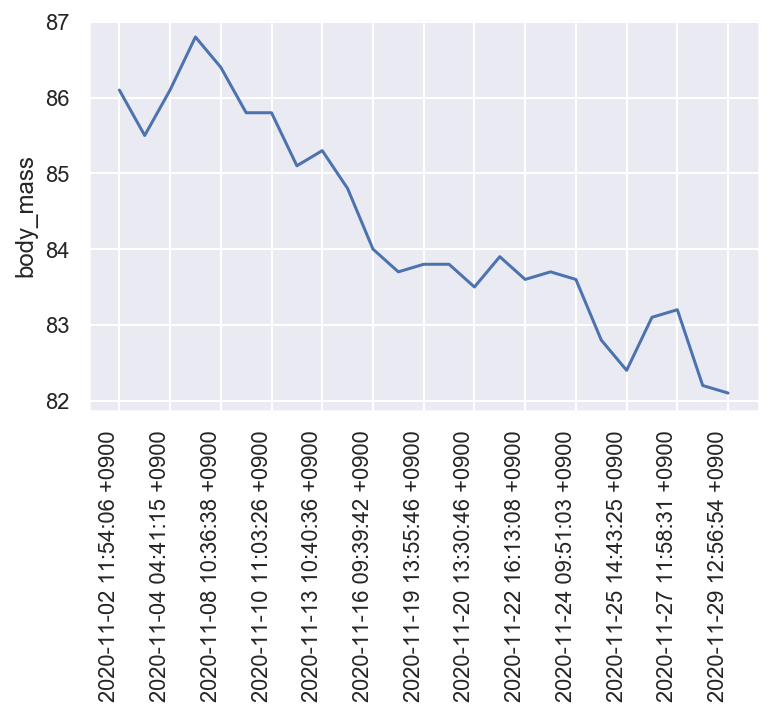

In [11]:
vis.show(type='body_mass', begin_date='2020-11-1', end_date='2020-12-1')

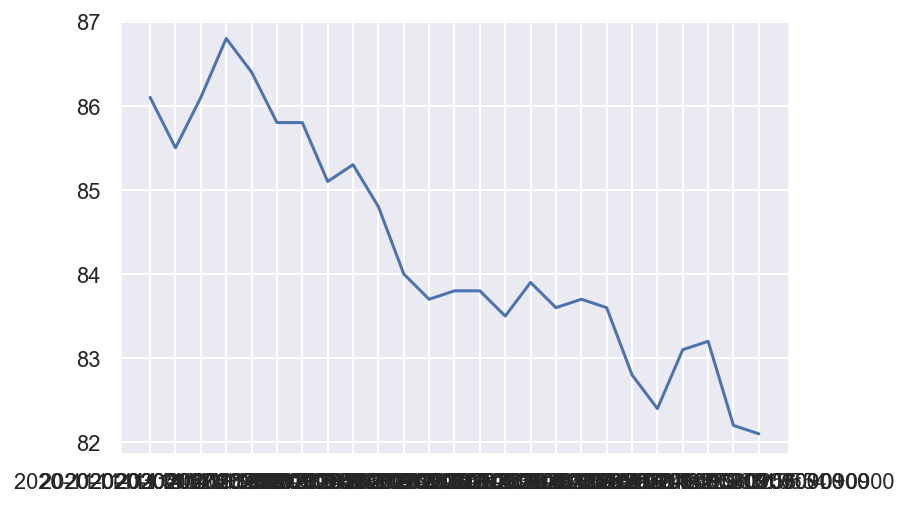

In [12]:
plt.plot(vis.df['date'], vis.df['value'])

In [13]:
man.df.loc('date') = pd.to_datetime(man.df['date'])

SyntaxError: can't assign to function call (<ipython-input-13-cde8c3ad0af4>, line 1)

In [ ]:
man.df

In [ ]:
vis.df

In [ ]:
fig, ax = plt.subplots()
ax.plot(vis.df['date'], vis.df['value'])



In [ ]:
a = ax.get_xticks()

In [ ]:
len(a)

In [ ]:
from matplotlib.dates import DateFormatter, date2num
fig, ax = plt.subplots()

ax.plot(vis.df['date'], vis.df['value'])
ax.set_xticks(ax.get_xticks()[::int(len(a)/10)])
plt.xticks(rotation=90)


